In [1]:
from IPython.display import HTML

HTML("""
<style>
    #notebook-container {
    width: 80% !important;
}
.dataTable {
    width: 100% !important;
}
.dataTables_scrollBody {
    width: 100% !important;
}
.dataTables_scrollHead {
    width: 100% !important;
}
.dataTables_filter {
   float: right !important;
}
.output_html {
    max-width: calc(100%) !important;
}
.rendered{
    font-size: 125%;
}
</style>
""")

html1 = """
    <img src="https://images.theconversation.com/files/45159/original/rptgtpxd-1396254731.jpg" style="margin-left:auto; margin-right:auto"/>
"""
HTML(html1)

# A quick analysis of my reading habits

* What do I read the most?
* What format do I prefer?
* Are there any Genre-Sub-Genre pairs I tend to gravitate towards?
* Who is my most read author?
* How long does it take me to read books?

In [2]:
import pandas as pd
import seaborn as sns
import plot

df = pd.read_csv('BookList.csv')

#removes any blank rows or books I never finished/rated
df = df[df['Rating'].notnull()]

# convert columns to correct (or better) data types
df[['Year', 'Pages']] = df[['Year', 'Pages']].apply(pd.to_numeric, downcast='integer')
df['Duration'] = df['Duration'].apply(pd.to_numeric, downcast='integer')
df['Rating'] = df['Rating'].apply(pd.to_numeric, downcast='float')
df['Start Date']= pd.to_datetime(df['Start Date'])
df['Finish Date']= pd.to_datetime(df['Finish Date'])

### Genre Count

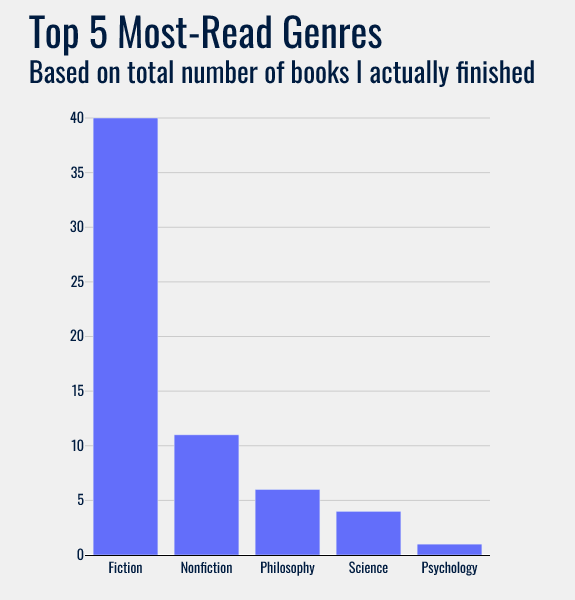

In [3]:
title = "Top 5 Most-Read Genres"
sub = f"Based on total number of books I actually finished"

plot.gen_bar_graph(df, 'Genre', title, sub)

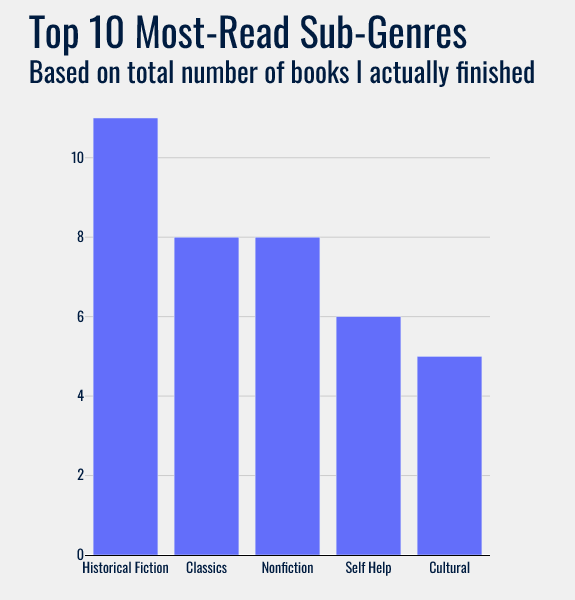

In [4]:
title = "Top 10 Most-Read Sub-Genres"
sub = f"Based on total number of books I actually finished"

plot.gen_bar_graph(df, 'Sub-Genre', title, sub)

In [5]:
#df[df.isna().any(axis=1)]

### Most Common Genre-Sub-Genre Pairing

In [6]:
df[['Genre', 'Sub-Genre']].value_counts()

Genre       Sub-Genre         
Fiction     Historical Fiction    11
            Classics               7
            Cultural               5
            Fantasy                5
Philosophy  Nonfiction             5
Nonfiction  Self Help              5
Science     Nonfiction             3
Fiction     Sci-fi                 3
Nonfiction  History                3
            Memoir                 2
Fiction     German Literature      2
            Contemporary           2
Psychology  Self Help              1
Philosophy  Classics               1
Fiction     Short Stories          1
Nonfiction  Graphic Novel          1
Fiction     Young Adult            1
            Science Fiction        1
            Mystery                1
            Graphic Novel          1
Science     Programming            1
Name: count, dtype: int64

### Most-Read Author

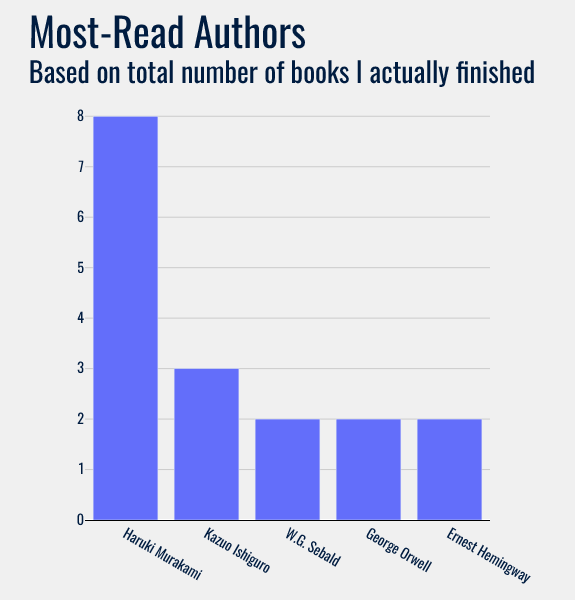

In [7]:
title = "Most-Read Authors"
sub = f"Based on total number of books I actually finished"

plot.gen_bar_graph(df, 'Author', title, sub)

## This is still a test to see if GitHub Pages is working correctly. Analysis to come soon!